In [560]:
# Import Libraries
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Imputer, LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression

In [15]:
## Read in CSV Files from 2014-2018 ##
# Read CSV File 2018
fantasy_stats_2018 = pd.read_csv('Data/Fantasy_Stats_2018-19.csv', header=1, index_col='Rk')
fantasy_stats_2018 = fantasy_stats_2018.rename(columns={'VBD▼': 'VBD'})
fantasy_stats_2018['Year'] = '2018'
pd.options.display.max_columns = None
#display(fantasy_stats_2018)

# Read CSV File 2017
fantasy_stats_2017 = pd.read_csv('Data/Fantasy_Stats_2017-18.csv', header=1, index_col='Rk')
pd.options.display.max_columns = None
fantasy_stats_2017['Year'] = '2017'
#display(fantasy_stats_2017)

# Read CSV File 2016
fantasy_stats_2016 = pd.read_csv('Data/Fantasy_Stats_2016-17.csv', header=1, index_col='Rk')
pd.options.display.max_columns = None
fantasy_stats_2016['Year'] = '2016'
#display(fantasy_stats_2016)

# Read CSV File 2015
fantasy_stats_2015 = pd.read_csv('Data/Fantasy_Stats_2015-16.csv', header=1, index_col='Rk')
pd.options.display.max_columns = None
fantasy_stats_2015['Year'] = '2015'
#display(fantasy_stats_2015)

# Read CSV File 2014
fantasy_stats_2014 = pd.read_csv('Data/Fantasy_Stats_2014-15.csv', header=1, index_col='Rk')
pd.options.display.max_columns = None
fantasy_stats_2014['Year'] = '2014'
#display(fantasy_stats_2014)


In [338]:
## Quarterbacks ##
#
# 2018 Quarterbacks
qb_2018 = fantasy_stats_2018[fantasy_stats_2018['FantPos'] == 'QB'].head(37)
#qb_2018 = pd.DataFrame(qb_2018[:37])

# 2017 Quarterbacks
qb_2017 = fantasy_stats_2017[fantasy_stats_2017['FantPos'] == 'QB']
qb_2017 = pd.DataFrame(qb_2017[:37])
#display(qb_2017[:10])

# 2016 Quarterbacks
qb_2016 = fantasy_stats_2016[fantasy_stats_2016['FantPos'] == 'QB']
qb_2016 = pd.DataFrame(qb_2016[:37])
#display(qb_2016[:10])

# 2015 Quarterbacks
qb_2015 = fantasy_stats_2015[fantasy_stats_2015['FantPos'] == 'QB']
qb_2015 = pd.DataFrame(qb_2015[:37])
#display(qb_2015[:10])

# 2014 Quarterbacks
qb_2014 = fantasy_stats_2014[fantasy_stats_2014['FantPos'] == 'QB']
qb_2014 = pd.DataFrame(qb_2014[:37])
#display(qb_2014[:10])

# Combine QBs
qb = qb_2018.merge(qb_2017, how='outer', on=None)
qb = qb.merge(qb_2016, how='outer', on=None)
qb = qb.merge(qb_2015, how='outer', on=None)
qb = qb.merge(qb_2014, how='outer', on=None)

#qb = (qb_2018.merge(qb_2017, how='outer', on=None)
     # .merge(qb_2016, how='outer', on=None)
     #)

# Removing special characters from player names
qb = pd.DataFrame(qb)
qb['Player'] = qb['Player'].str.strip('*+')

# Change NaN Values to 0
qb = qb.fillna(0)
#print('--------qb---------')
display(qb[:5])


,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,TD,Int,Att.1,Yds.1,Y/A,TD.1,Tgt,Rec,Yds.2,Y/R,TD.2,Fmb,FL,TD.3,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank,Year
0,Patrick Mahomes,KAN,QB,23,16,16,383,580,5097,50,12,60,272,4.53,2,0,0,0,0.0,0,9,2,2,1.0,0.0,417.0,417.1,437.1,429.1,134.0,1,5.0,2018
1,Matt Ryan,ATL,QB,33,16,16,422,608,4924,35,7,33,125,3.79,3,1,1,5,5.0,1,10,5,4,0.0,2.0,354.0,355.0,373.0,361.5,71.0,2,21.0,2018
2,Ben Roethlisberger,PIT,QB,36,16,16,452,675,5129,34,16,31,98,3.16,3,1,1,-1,-1.0,0,7,2,3,0.0,4.0,341.0,341.9,362.9,357.4,58.0,3,27.0,2018
3,Deshaun Watson,HOU,QB,23,16,16,345,505,4165,26,9,99,551,5.57,5,0,0,0,0.0,0,9,3,5,0.0,0.0,332.0,331.7,349.7,340.7,49.0,4,31.0,2018
4,Andrew Luck,IND,QB,29,16,16,430,639,4593,39,15,46,148,3.22,0,2,1,4,4.0,0,6,1,0,0.0,2.0,327.0,327.9,349.9,342.4,44.0,5,38.0,2018


---------QB Correlation---------


,FantPt,Cmp,Att,Yds,TD,Tgt,Att.1,Yds.1,TD.1,Fmb,FL,Int,TD.3
FantPt,1.0,0.834737,0.817666,0.900263,0.928808,0.075801,0.496426,0.304283,0.311959,0.427022,0.333404,0.291868,0.305756


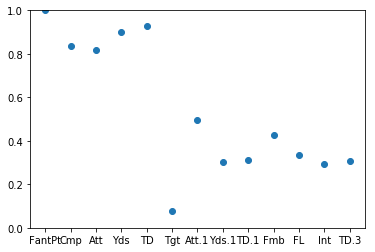

,TD,Age,GS,Cmp,Att,Yds,Int,Att.1,Yds.1,TD.1
TD,1.0,0.263282,0.804183,0.833636,0.816332,0.89592,0.362045,0.291407,0.101323,0.065803


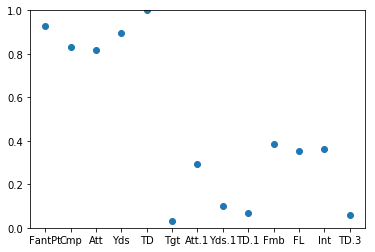

---------QB Sorted---------


,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,TD,Int,Att.1,Yds.1,Y/A,TD.1,Tgt,Rec,Yds.2,Y/R,TD.2,Fmb,FL,TD.3,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank,Year
0,Patrick Mahomes,KAN,QB,23,16,16,383,580,5097,50,12,60,272,4.53,2,0,0,0,0.0,0,9,2,2,1.0,0.0,417.0,417.1,437.1,429.1,134.0,1,5.0,2018
149,Andrew Luck,IND,QB,25,16,16,380,616,4761,40,16,64,273,4.27,3,0,0,0,0.0,0,13,6,3,0.0,0.0,356.0,351.7,379.7,367.7,90.0,2,14.0,2014
74,Aaron Rodgers,GNB,QB,33,16,16,401,610,4428,40,7,67,369,5.51,4,0,0,0,0.0,0,8,4,4,1.0,1.0,382.0,380.0,397.0,387.0,114.0,1,4.0,2016
151,Peyton Manning,DEN,QB,38,16,16,395,597,4727,39,15,24,-24,-1.00,0,0,0,0,0.0,0,6,2,0,0.0,2.0,313.0,312.7,332.7,327.7,47.0,4,32.0,2014
4,Andrew Luck,IND,QB,29,16,16,430,639,4593,39,15,46,148,3.22,0,2,1,4,4.0,0,6,1,0,0.0,2.0,327.0,327.9,349.9,342.4,44.0,5,38.0,2018


(185, 33)

In [337]:
# QB Correlation

qb_corr = qb[['FantPt', 'Cmp', 'Att', 'Yds', 'TD', 'Tgt', 'Att.1', 'Yds.1', 'TD.1', 'Fmb', 'FL', 'Int', 'TD.3']].corr(method='spearman', min_periods=185)
print('---------QB Correlation---------')
display(qb_corr[:1])
plt.plot('FantPt', data=qb_corr, linestyle='none', marker='o')
plt.ylim(0,1)
plt.show()

# QB TD Correlation

td_corr = qb[['TD', 'Tm', 'Age', 'GS', 'Cmp', 'Att', 'Yds', 'Int', 'Att.1', 'Yds.1', 'TD.1']].corr(method='spearman', min_periods=185)
display(td_corr[:1])
plt.plot('TD', data=qb_corr, linestyle='none', marker='o')
plt.ylim(0,1)
plt.show()


qb_sorted = qb.sort_values(by=['TD', 'Yds', 'Cmp', 'Att', 'Att.1', 'TD.1'], na_position='last', ascending=False)
print('---------QB Sorted---------')
display(qb_sorted[:5])
qb_sorted.shape

In [781]:
# 
#print(qb.shape)
#qb.info()

In [672]:
# New qb to test float v ints

new_qb = qb.drop(columns=['Player','Tm','FantPos','PPR','DKPt','FDPt','VBD','PosRank','OvRank','2PM','2PP','Y/A','Y/R'])
new_qb['FantPt'] = new_qb['FantPt'].astype(np.int64)
new_qb['Year'] = new_qb['Year'].astype(np.int64)
new_qb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 0 to 184
Data columns (total 20 columns):
Age       185 non-null int64
G         185 non-null int64
GS        185 non-null int64
Cmp       185 non-null int64
Att       185 non-null int64
Yds       185 non-null int64
TD        185 non-null int64
Int       185 non-null int64
Att.1     185 non-null int64
Yds.1     185 non-null int64
TD.1      185 non-null int64
Tgt       185 non-null int64
Rec       185 non-null int64
Yds.2     185 non-null int64
TD.2      185 non-null int64
Fmb       185 non-null int64
FL        185 non-null int64
TD.3      185 non-null int64
FantPt    185 non-null int64
Year      185 non-null int64
dtypes: int64(20)
memory usage: 35.4 KB


In [686]:
# Get rid of current year points and shift up next years FantPts
train_qb = new_qb[new_qb['Year']!=2018]
test_qb = new_qb[new_qb['Year']==2018]

In [687]:
train_cols = [i for i in new_qb.columns if i != 'FantPt']
X_train = train_qb[train_cols]
y_train = train_qb['FantPt']

X_test = test_qb[train_cols]
y_test = test_qb['FantPt']

In [847]:
# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred_reg_all = reg_all.predict(X_test)

In [848]:
# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred_reg_all))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.9987746415914626
Root Mean Squared Error: 2.9644978046993926


In [ ]:
# Predicting top 20 qbs using Linear Regression: reg_all

In [821]:
top20_qbs = test_qb[:20]

In [822]:
top20_qbs = top20_qbs.drop('FantPt', axis=1)

In [857]:
# Using Linear Regression Model
y_top20_qbs_reg_all = reg_all.predict(top20_qbs)
y_top20_qbs_reg_all

array([423.25137155, 355.76412726, 338.18223152, 337.74911753,
       329.16852721, 311.47709057, 314.68312779, 303.00144608,
       298.74716831, 286.85755366, 278.11440108, 282.68026545,
       279.60032425, 282.15915335, 259.24721317, 237.33154945,
       242.73359726, 216.86031257, 218.51748154, 215.09979921])

In [864]:
y_top20_qbs_reg_all = pd.DataFrame(y_top20_qbs_reg_all)

In [880]:
qb_names = qb['Player'][:20]

In [866]:
frames_reg_all = [qb_names, y_top20_qbs_reg_all]

In [867]:
qb_names_pred = pd.concat(frames, axis=1)

In [868]:
qb_names_pred.columns = ['Player', 'Predicted FantPt']

In [869]:
# Using Linear Regression Model
qb_names_pred.sort_values(['Predicted FantPt'], ascending=False)

,Player,Predicted FantPt
0,Patrick Mahomes,423.251372
1,Matt Ryan,355.764127
2,Ben Roethlisberger,338.182232
3,Deshaun Watson,337.749118
4,Andrew Luck,329.168527
6,Jared Goff,314.683128
5,Aaron Rodgers,311.477091
7,Drew Brees,303.001446
8,Russell Wilson,298.747168
9,Dak Prescott,286.857554


In [840]:
# Create the Log Regression classifier: logreg

In [895]:
# Create the regressor: reg_all
logreg = LogisticRegression(solver='liblinear', multi_class='auto')

# Fit the regressor to the training data
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [918]:
top20_qbs = test_qb[:20]

In [919]:
top20_qbs = top20_qbs.drop('FantPt', axis=1)

In [917]:
# Predict on the test data: y_pred
y_pred_logreg = logreg.predict(top20_qbs)
y_pred_logreg

array([356, 274, 356, 279, 292, 261, 278, 295, 200, 223, 263, 223, 292,
       261, 295, 228, 119, 230, 206, 176], dtype=int64)

In [911]:
qb_names = qb['Player'][:20]

In [920]:
top20_qbs_logreg = pd.DataFrame(y_pred_logreg)

In [921]:
frames_logreg = [qb_names, top20_qbs_logreg]

In [922]:
qb_names_pred = pd.concat(frames_logreg, axis=1)

In [923]:
qb_names_pred.columns = ['Player', 'Predicted FantPt']

In [924]:
# Using Log Regression Model
qb_names_pred.sort_values(['Predicted FantPt'], ascending=False)

,Player,Predicted FantPt
0,Patrick Mahomes,356
2,Ben Roethlisberger,356
14,Mitchell Trubisky,295
7,Drew Brees,295
4,Andrew Luck,292
12,Kirk Cousins,292
3,Deshaun Watson,279
6,Jared Goff,278
1,Matt Ryan,274
10,Philip Rivers,263


In [614]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize=True)

In [615]:
# Fit the regressor to the data
lasso.fit(X_train,y_train)

# Compute and print the coefficients
lasso_coef = lasso.fit(X_train,y_train).coef_
print(lasso_coef)

[ 0.          0.          0.          0.          0.          0.03056057
  4.04406464 -0.          0.36208398  0.04042724  3.4636954   0.
  0.          0.         -0.          0.         -0.          0.
  0.        ]


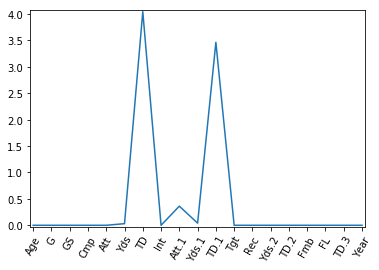

In [616]:
# Plot the coefficients
plt.plot(range(len(train_cols)), lasso_coef)
plt.xticks(range(len(train_cols)), train_cols, rotation=60)
plt.margins(0.009)
plt.show()

In [573]:
# Perform 3-fold CV
cvscores_3 = cross_val_score(reg_all, X_test, y_test, cv=3)
print(np.mean(cvscores_3))

0.9510783920261612


In [568]:
# Perform 5-fold CV
cvscores_6 = cross_val_score(reg_all, X_test, y_test, cv=6)
print(np.mean(cvscores_6))

0.9339572685885056


In [371]:
# Get dummies
# using qb_combined for columns
# Create dummy variables
qb_dummies = pd.get_dummies(qb, columns=['Player','Tm','FantPos'])
qb_combined = pd.concat([qb, qb_dummies], axis=1)

#print(qb_dummies.columns)
print(qb.shape)
print(qb_dummies.shape)

qb_cols = qb_dummies
qb_cols.reset_index(level=0)
print(qb_cols.shape)
#print(qb)
#print(qb_cols['FantPt'])
print(qb_cols.columns)

(185, 33)
(185, 136)
(185, 136)
Index(['Age', 'G', 'GS', 'Cmp', 'Att', 'Yds', 'TD', 'Int', 'Att.1', 'Yds.1',
       ...
       'Tm_PHI', 'Tm_PIT', 'Tm_SDG', 'Tm_SEA', 'Tm_SFO', 'Tm_STL', 'Tm_TAM',
       'Tm_TEN', 'Tm_WAS', 'FantPos_QB'],
      dtype='object', length=136)


In [432]:
qb_cols = qb.drop(columns=['Player','Tm','FantPos','Age', 'G', 'GS','PPR', 'DKPt', 'FDPt', 'VBD', 'PosRank',
       'OvRank', '2PM', '2PP'])

In [433]:
print(qb_cols.shape)
print(qb_cols.columns)

(185, 19)
Index(['Cmp', 'Att', 'Yds', 'TD', 'Int', 'Att.1', 'Yds.1', 'Y/A', 'TD.1',
       'Tgt', 'Rec', 'Yds.2', 'Y/R', 'TD.2', 'Fmb', 'FL', 'TD.3', 'FantPt',
       'Year'],
      dtype='object')


In [282]:
#qb_cols = pd.DataFrame.fillna(qb_cols, value=0)

In [ ]:
['Age', 'G', 'GS', 'Cmp', 'Att', 'Yds', 'TD',
       'Int', 'Att.1', 'Yds.1', 'Y/A', 'TD.1', 'Tgt', 'Rec', 'Yds.2', 'Y/R',
       'TD.2', 'Fmb', 'FL', 'TD.3', '2PM', '2PP', 'PPR','Year']

In [434]:
# Get rid of current year points and shift up next years FantPts
train_qb = qb_cols[qb_cols['Year']!='2018']
test_qb = qb_cols[qb_cols['Year']=='2018']

In [399]:
#print(test_qb['Year'])
train_cols = qb_cols.drop(columns=['FantPt'])
#print(train_cols)

In [435]:
# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

train_cols = [i for i in qb_cols.columns if i != 'FantPt']
X_train = train_qb[train_cols]
y_train = train_qb['FantPt']

X_test = test_qb[train_cols]
y_test = test_qb['FantPt']

In [431]:
#print(X_test)

In [437]:
# Scaling the variables
scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.fit_transform(X_test)

In [438]:
print(X_train)

[[ 0.615785    0.76521782  0.69820165 ...  0.30674448  0.78020359
   1.34164079]
 [ 0.12492586  0.3444622   0.09294342 ... -0.85731149  2.42195902
   1.34164079]
 [ 1.08619168  0.95835154  1.22613614 ...  0.30674448 -0.86155184
   1.34164079]
 ...
 [-1.36810402 -1.46961529 -1.36909738 ... -0.85731149 -0.31430003
  -1.34164079]
 [-1.56240243 -1.64205612 -1.32199211 ... -0.27528351 -0.86155184
  -1.34164079]
 [-1.7771533  -1.77311114 -1.66328309 ... -1.43933947 -0.86155184
  -1.34164079]]


In [439]:
# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.0


In [440]:
# Predict the labels for the training data X
y_pred = knn.predict(X_train)
y_pred

array([250., 249., 270., 224., 192., 205., 187., 255., 185., 185., 206.,
       194., 192., 185., 194., 200., 194., 206., 200., 187., 200., 187.,
       187., 158., 176., 130., 113., 200., 130., 133.,  89.,  53.,  53.,
        64.,  66.,  53.,  53., 261., 261., 226., 230., 244., 261., 228.,
       206., 194., 270., 270., 157., 195., 226., 236., 169., 200., 206.,
       187., 306., 195., 205., 192., 192., 200., 158., 126.,  73., 113.,
        53.,  53.,  53.,  89.,  53.,  66.,  53.,  53., 249., 210., 251.,
       256., 266., 266., 230., 200., 168., 236., 270., 250., 261., 223.,
       266., 180., 192., 166., 195., 158., 192., 270., 166., 195., 119.,
        96.,  89.,  67.,  67.,  71.,  66.,  53.,  95.,  66.,  53.,  67.,
        67., 230., 254., 226., 266., 236., 192., 266., 270., 192., 254.,
       195., 195., 266., 230., 195., 200., 176., 270., 180., 157., 180.,
       180.,  96., 133.,  96., 192., 119.,  89., 119.,  88.,  71.,  67.,
        67.,  89.,  87., 119.,  67.])

In [ ]:
# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

# Predict the labels for the training data X
y_pred = knn.predict(X_qb)
display(X_qb[:5])

In [461]:
# Fitting Linear Regression to training data
classifier = LogisticRegression(random_state=0, solver='liblinear', multi_class='auto', class_weight='balanced')
classifier.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [462]:
classifier.score(X_test, y_test)

0.0

In [463]:
# Predicting the test set results
y_prediction = classifier.predict(X_train)
y_prediction

array([348., 299., 296., 238., 348., 278., 274., 296., 185., 234., 271.,
       255., 250., 238., 228., 271., 211., 260., 293., 187., 205., 202.,
       187., 185., 176., 169., 158., 135.,  74., 126., 123., 102.,  68.,
        73.,  74.,  68.,  64., 382., 355., 336., 211., 306., 293., 282.,
       271., 296., 270., 270., 268., 313., 324., 211., 355., 293., 260.,
       187., 286., 336., 226., 223., 217., 135., 194., 202., 168., 133.,
       113.,  80.,  80.,  73.,  71.,  66.,  57.,  53., 391., 344., 342.,
       324., 313., 286., 382., 205., 292., 287., 286., 285., 166., 275.,
       287., 224., 259., 391., 236., 234., 230., 210., 293., 236.,  90.,
       166., 136., 133.,  90.,  90., 112.,  96., 234., 136.,  80.,  90.,
        67., 358., 356., 332., 313., 310., 292., 284., 280., 292., 284.,
       358., 313., 313., 256., 254., 251., 249., 225., 224., 157., 174.,
       180.,  88., 174., 159., 157., 139., 127.,  88., 108., 106.,  95.,
        90., 136.,  89.,  88.,  87.])

In [464]:
# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Split into training and test set
#X_train, X_test, y_train, y_test = train_test_split(X_qb, y_qb, test_size = 0.25, random_state=42)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

# Predict the labels for the training data X
y_pred = knn.predict(X_train)

0.0


Text(0.5,1,'Points vs Predicted Points')

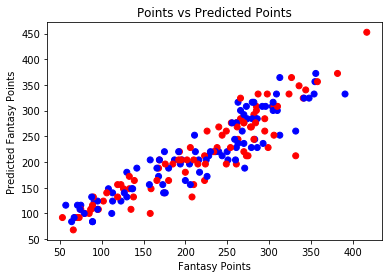

In [14]:
plt.scatter(qb["FantPt"], m.fittedvalues, color=['red', 'blue'])
plt.xlabel("Fantasy Points")
plt.ylabel("Predicted Fantasy Points")
plt.title("Points vs Predicted Points")

In [ ]:
# Linear Regression
# 
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

m = ols('FantPt ~ TD',qb).fit()
print(m.summary())

In [38]:
# Testing coef of different variables
# Cmp:0.7477  Att:0.5021  Yds:0.0688  TD:8.0115  Int:6.3821  AttR:1.4895  YdsR:0.1698  YperA:3.8251(large p-value)
# Rankings: 
# 1.TD 2.Int 3.AttR 
# 4.Cmp 5.Att 6.YrdsR 7.Yds
# Need to look into removing Interceptions... This is not a good way of predicting sucessful QBs

# Cleaning data to test variables with special characters
qb_test = qb.rename(columns={'Att.1': 'AttR'})

m = ols('FantPt ~ AttR',qb_test).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                 FantPt   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     51.00
Date:                Wed, 28 Aug 2019   Prob (F-statistic):           2.10e-11
Time:                        16:51:49   Log-Likelihood:                -1061.0
No. Observations:                 185   AIC:                             2126.
Df Residuals:                     183   BIC:                             2133.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    154.9571      9.977     15.532      0.0

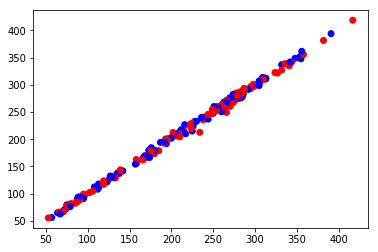

In [50]:
from sklearn.linear_model import LinearRegression

X = qb.drop(['FantPt', 'Tm', 'Player', 'FantPos', 'Age', 'G', 'GS', 'Tgt', 'Rec', 'Yds.2', 'Y/R', 'TD.2', 'Fmb', 'FL', 'TD.3', 
            '2PM', '2PP', 'PPR', 'DKPt', 'FDPt', 'VBD', 'PosRank', 'OvRank', 'Year'], axis = 1)

lm = LinearRegression()

lm.fit(X, qb.FantPt)
plt.scatter(qb["FantPt"], lm.predict(X), color=['red','blue'])

In [23]:
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib
import matplotlib.pyplot as pp

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

import re
import mailbox
import csv

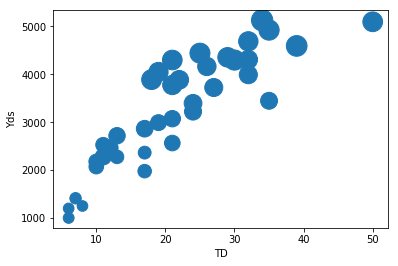

In [58]:
def plotyear(year):
    data = qb[qb.Year == year]
    area = data.Att * 0.67
    
    
    data.plot.scatter('TD', 'Yds', s=area)
    
plotyear('2018')

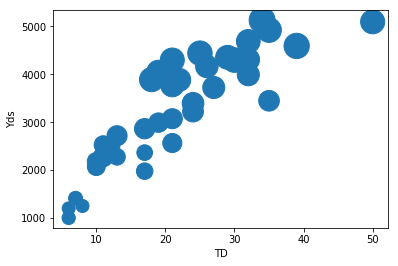

In [65]:
data = qb[qb.Year == '2018']
area = data.Att


data.plot.scatter('TD', 'Yds', s=area)

In [6]:
# Read 2018 Weekly QB Leaders
# 
qb_week_leaders_2018 = pd.read_csv('Data/QB_Weekly_Leaders_2018.csv', header=1, index_col='Rk')
pd.options.display.max_columns = None
qb_week_leaders_2018 = pd.DataFrame(qb_week_leaders_2018)

# Cleaning up the Players Names
#
qb_week_leaders_2018['Player'] = qb_week_leaders_2018['Player'].str.replace('\\', "..")
qb_week_leaders_2018['Player'] = qb_week_leaders_2018['Player'].str.partition("..")

#display(qb_week_leaders_2018[:2])

# Read in 2018 Red Zone Passing Stats
#
qb_rz_2018 = pd.read_csv('Data/Passing_RZ_2018.csv', header=1, index_col='Rk')
pd.options.display.max_columns = None
qb_rz_2018 = pd.DataFrame(qb_rz_2018)

#display(qb_rz_2018[:3])

# Cleaning up the Players Names
#
qb_rz_2018['Player'] = qb_rz_2018['Player'].str.replace('\\', "..")
qb_rz_2018['Player'] = qb_rz_2018['Player'].str.partition("..")

display(qb_rz_2018[:3])

,Player,Tm,Cmp.2,Att.2,Cmp%.2,Yds.2,TD.2,Int.2,Cmp.1,Att.1,Cmp%1.,Yds.1,TD.1,Int.1
Rk,,,,,,,,,,,,,,
1,Patrick Mahomes,KAN,66,103,64.08,488,35,1,27,47,57.45,103,20,0
2,Andrew Luck,IND,67,100,67.00,470,33,1,30,43,69.77,128,19,0
3,Russell Wilson,SEA,36,63,57.14,289,24,2,18,33,54.55,81,14,1


In [82]:
## Running Backs ##
#
# 
# 2018 Running Backs
rb_2018 = fantasy_stats_2018[fantasy_stats_2018['FantPos'] == 'RB']
rb_2018 = rb_2018[:73]

# 2017 Running Backs
rb_2017 = fantasy_stats_2017[fantasy_stats_2017['FantPos'] == 'RB']
rb_2017 = pd.DataFrame(rb_2017[:73])
#display(rb_2017[:10])

# 2016 Running Backs
rb_2016 = fantasy_stats_2016[fantasy_stats_2016['FantPos'] == 'RB']
rb_2016 = pd.DataFrame(rb_2016[:73])
#display(rb_2016[:10])

# 2015 Running Backs
rb_2015 = fantasy_stats_2015[fantasy_stats_2015['FantPos'] == 'RB']
rb_2015 = pd.DataFrame(rb_2015[:73])
#display(rb_2015[:10])

# 2014 Running Backs
rb_2014 = fantasy_stats_2014[fantasy_stats_2014['FantPos'] == 'RB']
rb_2014 = pd.DataFrame(rb_2014[:73])
#display(rb_2014[:10])

# Combine RBs
rb = rb_2018.merge(rb_2017, how='outer', on=None)
rb = rb.merge(rb_2016, how='outer', on=None)
rb = rb.merge(rb_2015, how='outer', on=None)
rb = rb.merge(rb_2014, how='outer', on=None)


# Removing special characters from player names
rb = pd.DataFrame(rb)
rb['Player'] = rb['Player'].str.strip('*+')

# Change NaN Values to 0
rb = rb.fillna(0)
print('--------rb---------')
display(rb[:5])


--------rb---------


,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,TD,Int,Att.1,Yds.1,Y/A,TD.1,Tgt,Rec,Yds.2,Y/R,TD.2,Fmb,FL,TD.3,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank,Year
0,Todd Gurley,LAR,RB,24,14,14,0,0,0,0,0,256,1251,4.89,17,81,59,580,9.83,4,1,1,21,3.0,0.0,313.0,372.1,379.1,342.6,178.0,1,1.0,2018
1,Saquon Barkley,NYG,RB,21,16,16,0,0,0,0,0,261,1307,5.01,11,121,91,721,7.92,4,0,0,15,1.0,0.0,295.0,385.8,391.8,340.3,159.0,2,2.0,2018
2,Christian McCaffrey,CAR,RB,22,16,16,1,1,50,1,0,219,1098,5.01,7,124,107,867,8.10,6,4,1,13,0.0,0.0,279.0,385.5,392.5,332.0,143.0,3,3.0,2018
3,Alvin Kamara,NOR,RB,23,15,13,0,0,0,0,0,194,883,4.55,14,105,81,709,8.75,4,1,0,18,3.0,0.0,273.0,354.2,360.2,313.7,138.0,4,4.0,2018
4,Ezekiel Elliott,DAL,RB,23,15,15,0,0,0,0,0,304,1434,4.72,6,95,77,567,7.36,3,6,1,9,0.0,0.0,252.0,329.1,336.1,290.6,117.0,5,7.0,2018


In [932]:
# Create arrays for the features and the response variable
# New rb to test float v ints

new_rb = rb.drop(columns=['Player','Tm','FantPos','Cmp','Att','Yds','TD','Int','FantPt','DKPt','FDPt','VBD','PosRank','OvRank'])
new_rb['Year'] = new_rb['Year'].astype(np.int64)
#new_rb.info()

In [933]:
# Get rid of current year points and shift up next years FantPts
train_rb = new_rb[new_rb['Year']!=2018]
test_rb = new_rb[new_rb['Year']==2018]

In [939]:
train_cols = [i for i in new_rb.columns if i != 'PPR']
X_train_rb = train_rb[train_cols]
y_train_rb = train_rb['PPR']

In [940]:
X_test_rb = test_rb[train_cols]
y_test_rb = test_rb['PPR']

In [941]:
# Create the regressor: reg_all
reg_all = LinearRegression()

In [942]:
# Fit the regressor to the training data
reg_all.fit(X_train_rb, y_train_rb)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [943]:
# Predict on the test data: y_pred
y_pred_reg_all = reg_all.predict(X_test_rb)

In [944]:
# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test_rb, y_test_rb)))
rmse = np.sqrt(mean_squared_error(y_test_rb, y_pred_reg_all))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.9998918036671935
Root Mean Squared Error: 0.8470936976415374


In [946]:
top50_rbs = test_rb[:50]

In [947]:
top50_rbs = top50_rbs.drop('PPR', axis=1)

In [948]:
# Using Linear Regression Model
y_top50_rbs_reg_all = reg_all.predict(top50_rbs)
y_top50_rbs_reg_all

array([372.05026513, 386.14894046, 379.69692515, 354.03100637,
       329.32910207, 275.4012648 , 279.85000364, 230.44099932,
       243.67888591, 246.72817904, 276.88050013, 223.02107133,
       200.92387344, 201.53301424, 194.7201128 , 189.03038547,
       229.76828711, 193.78377878, 178.15672061, 180.05822831,
       206.36463087, 172.80414441, 171.54330594, 162.60126286,
       139.21868617, 150.49804788, 168.85900867, 142.47144528,
       140.73855532, 173.2685038 , 152.19315623, 131.7424506 ,
       139.57557766, 136.86379606, 160.73976993, 119.97555426,
       120.43932706, 161.04449216, 108.75857809, 127.19886901,
       102.53754914, 156.35797213, 117.29570677,  89.77493692,
        98.33555659, 101.35904782, 114.33184311, 131.69848686,
        86.36478593,  97.23354795])

In [949]:
y_top50_rbs_reg_all = pd.DataFrame(y_top50_rbs_reg_all)

In [950]:
rb_names = rb['Player'][:50]
frames_reg_all_rb = [rb_names, y_top50_rbs_reg_all]
rb_names_pred = pd.concat(frames_reg_all_rb, axis=1)
rb_names_pred.columns = ['Player', 'Predicted FantPt']

In [951]:
# Using Linear Regression Model
rb_names_pred.sort_values(['Predicted FantPt'], ascending=False)

,Player,Predicted FantPt
1,Saquon Barkley,386.148940
2,Christian McCaffrey,379.696925
0,Todd Gurley,372.050265
3,Alvin Kamara,354.031006
4,Ezekiel Elliott,329.329102
6,James Conner,279.850004
10,James White,276.880500
5,Melvin Gordon,275.401265
9,David Johnson,246.728179
8,Joe Mixon,243.678886


-----RB Correlation------


,PPR,Att.1,Yds.1,Y/A,TD.1,Tgt,Rec,Yds.2,Y/R,TD.2,Fmb,FL,TD.3
PPR,1.0,0.747687,0.773852,0.20881,0.65545,0.688557,0.692509,0.663845,0.095662,0.424127,0.391269,0.286833,0.788136


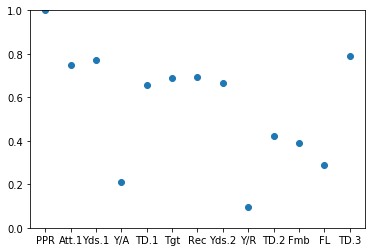

,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,TD,Int,Att.1,Yds.1,Y/A,TD.1,Tgt,Rec,Yds.2,Y/R,TD.2,Fmb,FL,TD.3,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank,Year
0,Todd Gurley,LAR,RB,24,14,14,0,0,0,0,0,256,1251,4.89,17,81,59,580,9.83,4,1,1,21,3.0,0.0,313.0,372.1,379.1,342.6,178.0,1,1.0,2018
146,David Johnson,ARI,RB,25,16,16,0,0,0,0,0,293,1239,4.23,16,120,80,879,10.99,4,5,3,20,1.0,0.0,328.0,407.8,416.8,367.8,196.0,1,1.0,2016
73,Todd Gurley,LAR,RB,23,15,15,0,0,0,0,0,279,1305,4.68,13,87,64,788,12.31,6,5,2,19,0.0,0.0,319.0,383.3,391.3,351.3,192.0,1,1.0,2017
152,LeGarrette Blount,NWE,RB,30,16,8,0,0,0,0,0,299,1161,3.88,18,8,7,38,5.43,0,2,1,18,0.0,0.0,226.0,232.9,236.9,229.4,94.0,7,8.0,2016
3,Alvin Kamara,NOR,RB,23,15,13,0,0,0,0,0,194,883,4.55,14,105,81,709,8.75,4,1,0,18,3.0,0.0,273.0,354.2,360.2,313.7,138.0,4,4.0,2018
294,Marshawn Lynch,SEA,RB,28,16,14,0,0,0,0,0,280,1306,4.66,13,48,37,367,9.92,4,4,2,17,0.0,0.0,265.0,302.3,310.3,283.8,146.0,3,3.0,2014
147,Ezekiel Elliott,DAL,RB,21,15,15,0,0,0,0,0,322,1631,5.07,15,39,32,363,11.34,1,5,1,16,0.0,0.0,293.0,325.4,332.4,309.4,162.0,2,2.0,2016
1,Saquon Barkley,NYG,RB,21,16,16,0,0,0,0,0,261,1307,5.01,11,121,91,721,7.92,4,0,0,15,1.0,0.0,295.0,385.8,391.8,340.3,159.0,2,2.0,2018
148,LeSean McCoy,BUF,RB,28,15,15,0,0,0,0,0,234,1267,5.41,13,57,50,356,7.12,1,3,0,14,1.0,0.0,248.0,298.3,304.3,273.3,117.0,3,3.0,2016
219,Devonta Freeman,ATL,RB,23,15,13,0,0,0,0,0,265,1056,3.98,11,97,73,578,7.92,3,3,2,14,0.0,0.0,243.0,316.4,324.4,279.9,120.0,1,2.0,2015


In [54]:
rb_corr = rb[['PPR', 'Att.1', 'Yds.1','Y/A','TD.1', 'Tgt', 'Rec', 'Yds.2', 'Y/R', 'TD.2', 'Fmb', 'FL', 'TD.3']].corr(method='spearman', min_periods=365)
print('-----RB Correlation------')
display(rb_corr[:1])
plt.plot('PPR', data=rb_corr, linestyle='none', marker='o')
plt.ylim(0,1)
plt.show()

#print('--------RB Sorted---------')
rb_sorted = rb.sort_values(by=['TD.3', 'Yds.1', 'Att.1', 'Rec', 'Tgt', 'Yds.2', 'TD.1'], na_position='last', ascending=False)
display(rb_sorted[:10])

In [142]:
# Read 2018 Weekly RB Leaders
# 
rb_week_leaders_2018 = pd.read_csv('Data/RB_Weekly_Leaders_2018.csv', header=1, index_col='Rk')
pd.options.display.max_columns = None
rb_week_leaders_2018 = pd.DataFrame(rb_week_leaders_2018)

# Cleaning up the Players Names
#
rb_week_leaders_2018['Player'] = rb_week_leaders_2018['Player'].str.replace('\\', "..")
rb_week_leaders_2018['Player'] = rb_week_leaders_2018['Player'].str.partition("..")

#display(rb_week_leaders_2018[:2])

# Read in 2018 Red Zone Rushing Stats
#
rb_rz_2018 = pd.read_csv('Data/Rushing_RZ_2018.csv', header=1, index_col='Rk')
pd.options.display.max_columns = None
rb_rz_2018 = pd.DataFrame(rb_rz_2018)

# Cleaning up the Players Names
#
rb_rz_2018['Player'] = rb_rz_2018['Player'].str.replace('\\', "..")
rb_rz_2018['Player'] = rb_rz_2018['Player'].str.partition("..")

#display(rb_rz_2018[:3])

-----WR Correlation------


,PPR,Att.1,Yds.1,Y/A,TD.1,Tgt,Rec,Yds.2,Y/R,TD.2,Fmb,FL,TD.3
PPR,1.0,0.087028,0.079276,0.059345,-0.007524,0.906128,0.931779,0.948721,0.094596,0.74142,0.275676,0.240967,0.748883


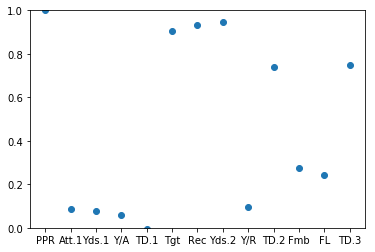

In [952]:
## Wide Receivers ##
#
# 
# 2018 Wide Receivers
wr_2018 = fantasy_stats_2018[fantasy_stats_2018['FantPos'] == 'WR']
wr_2018 = wr_2018[:91]
#display(wr_2018[:10])

# 2017 Wide Receivers
wr_2017 = fantasy_stats_2017[fantasy_stats_2017['FantPos'] == 'WR']
wr_2017 = pd.DataFrame(wr_2017[:91])
#display(rb_2017[:10])

# 2016 Wide Receivers
wr_2016 = fantasy_stats_2016[fantasy_stats_2016['FantPos'] == 'WR']
wr_2016 = pd.DataFrame(wr_2016[:91])
#display(wr_2016[:10])

# 2015 Wide Receivers
wr_2015 = fantasy_stats_2015[fantasy_stats_2015['FantPos'] == 'WR']
wr_2015 = pd.DataFrame(wr_2015[:91])
#display(wr_2015[:10])

# 2014 Wide Receivers
wr_2014 = fantasy_stats_2014[fantasy_stats_2014['FantPos'] == 'WR']
wr_2014 = pd.DataFrame(wr_2014[:91])
#display(wr_2014[:10])

# Combine WRs
wr = wr_2018.merge(wr_2017, how='outer', on=None)
wr = wr.merge(wr_2016, how='outer', on=None)
wr = wr.merge(wr_2015, how='outer', on=None)
wr = wr.merge(wr_2014, how='outer', on=None)

# Removing special characters from player names
wr = pd.DataFrame(wr)
wr['Player'] = wr['Player'].str.strip('*+')

# Change NaN Values to 0
wr = wr.fillna(0)
#print('--------wr---------')
#display(wr[:5])

wr_corr = wr[['PPR', 'Att.1', 'Yds.1','Y/A','TD.1', 'Tgt', 'Rec', 'Yds.2', 'Y/R', 'TD.2', 'Fmb', 'FL', 'TD.3']].corr(method='spearman', min_periods=90)
print('-----WR Correlation------')
display(wr_corr[:1])
plt.plot('PPR', data=wr_corr, linestyle='none', marker='o')
plt.ylim(0,1)
plt.show()

#print('--------WR Sorted---------')
wr_sorted = wr.sort_values(by=['Yds.2', 'Rec', 'Tgt', 'TD.3', 'TD.2'], na_position='last', ascending=False)
#display(wr_sorted[:10])



In [953]:
# Create arrays for the features and the response variable
# New wr to test float v ints

new_wr = wr.drop(columns=['Player','Tm','FantPos','Cmp','Att','Yds','TD','Int','FantPt','DKPt','FDPt','VBD','PosRank','OvRank'])
new_wr['Year'] = new_wr['Year'].astype(np.int64)
#new_wr.info()

In [954]:
# Get rid of current year points and shift up next years FantPts
train_wr = new_wr[new_wr['Year']!=2018]
test_wr = new_wr[new_wr['Year']==2018]

In [955]:
train_cols = [i for i in new_wr.columns if i != 'PPR']
X_train_wr = train_wr[train_cols]
y_train_wr = train_wr['PPR']

In [956]:
X_test_wr = test_wr[train_cols]
y_test_wr = test_wr['PPR']

In [957]:
# Create the regressor: reg_all
reg_all = LinearRegression()

In [958]:
# Fit the regressor to the training data
reg_all.fit(X_train_wr, y_train_wr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [960]:
# Predict on the test data: y_pred
y_pred_reg_all_wr = reg_all.predict(X_test_wr)

In [961]:
# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test_wr, y_test_wr)))
rmse = np.sqrt(mean_squared_error(y_test_wr, y_pred_reg_all_wr))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.999242112594116
Root Mean Squared Error: 1.919782099580481


In [962]:
top50_wrs = test_wr[:50]

In [963]:
top50_wrs = top50_wrs.drop('PPR', axis=1)

In [964]:
# Using Linear Regression Model
y_top50_wrs_reg_all = reg_all.predict(top50_wrs)
y_top50_wrs_reg_all

array([333.22579093, 323.60775485, 329.67621706, 333.55050901,
       325.99192247, 289.60776474, 307.54481411, 315.72032078,
       297.15524463, 265.57821336, 222.28700607, 266.48213978,
       243.10906916, 260.27818301, 238.84646359, 218.11621426,
       220.97255798, 206.86019735, 215.6442833 , 180.44774478,
       206.94694397, 214.64307427, 205.7566173 , 193.27839313,
       185.33765273, 185.20577304, 183.41335771, 180.55831791,
       182.53584776, 178.36988781, 179.15729205, 188.63665359,
       151.41317121, 165.18073188, 183.06780053, 156.54402816,
       149.50565555, 143.7235794 , 157.31122216, 164.68359249,
       138.61891259, 153.38078519, 137.19058214, 156.64456218,
       130.29113868, 137.65623789, 135.1284026 , 156.81512627,
       136.18327886, 141.76262628])

In [966]:
y_top50_wrs_reg_all = pd.DataFrame(y_top50_wrs_reg_all)

In [967]:
wr_names = wr['Player'][:50]
frames_reg_all_wr = [wr_names, y_top50_wrs_reg_all]
wr_names_pred = pd.concat(frames_reg_all_wr, axis=1)
wr_names_pred.columns = ['Player', 'Predicted FantPt']

In [968]:
# Using Linear Regression Model
wr_names_pred.sort_values(['Predicted FantPt'], ascending=False)

,Player,Predicted FantPt
3,DeAndre Hopkins,333.550509
0,Tyreek Hill,333.225791
2,Davante Adams,329.676217
4,Julio Jones,325.991922
1,Antonio Brown,323.607755
7,Michael Thomas,315.720321
6,Adam Thielen,307.544814
8,JuJu Smith-Schuster,297.155245
5,Mike Evans,289.607765
11,Stefon Diggs,266.482140


In [140]:
# Read 2018 Weekly Receiving Leaders
# 
wr_week_leaders_2018 = pd.read_csv('Data/WR_Weekly_Leaders_2018.csv', header=1, index_col='Rk')
pd.options.display.max_columns = None
wr_week_leaders_2018 = pd.DataFrame(wr_week_leaders_2018)

# Cleaning up the Players Names
#
wr_week_leaders_2018['Player'] = wr_week_leaders_2018['Player'].str.replace('\\', "..")
wr_week_leaders_2018['Player'] = wr_week_leaders_2018['Player'].str.partition("..")

#display(wr_week_leaders_2018[:2])

# Read in 2018 Red Zone Receiving Stats
#
wr_rz_2018 = pd.read_csv('Data/Receiving_RZ_2018.csv', header=1, index_col='Rk')
pd.options.display.max_columns = None
wr_rz_2018 = pd.DataFrame(wr_rz_2018)

#display(qb_rz_2018[:3])

# Cleaning up the Players Names
#
wr_rz_2018['Player'] = wr_rz_2018['Player'].str.replace('\\', "..")
wr_rz_2018['Player'] = wr_rz_2018['Player'].str.partition("..")

#display(wr_rz_2018[:3])

-----Tight End Correlation------


,PPR,Att.1,Yds.1,TD.1,Tgt,Rec,Yds.2,Y/R,TD.2,Fmb,FL,TD.3
PPR,1.0,0.269741,0.10491,0.146491,0.930313,0.945516,0.955681,0.04884,0.642559,0.299485,0.236633,0.655559


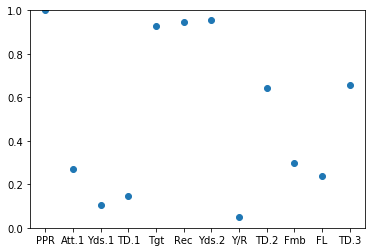

In [969]:
## Tight Ends ##
#
# 
# 2018 Tight Ends
te_2018 = fantasy_stats_2018[fantasy_stats_2018['FantPos'] == 'TE']
te_2018 = te_2018[:37]
#display(te_2018[:10])

# 2017 Tight Ends
te_2017 = fantasy_stats_2017[fantasy_stats_2017['FantPos'] == 'TE']
te_2017 = pd.DataFrame(te_2017[:37])
#display(te_2017[:10])

# 2016 Tight Ends
te_2016 = fantasy_stats_2016[fantasy_stats_2016['FantPos'] == 'TE']
te_2016 = pd.DataFrame(te_2016[:37])
#display(te_2016[:10])

# 2015 Tight Ends
te_2015 = fantasy_stats_2015[fantasy_stats_2015['FantPos'] == 'TE']
te_2015 = pd.DataFrame(te_2015[:37])
#display(te_2015[:10])

# 2014 Tight Ends
te_2014 = fantasy_stats_2014[fantasy_stats_2014['FantPos'] == 'TE']
te_2014 = pd.DataFrame(te_2014[:37])
#display(te_2014[:10])

# Combine TEs
te = te_2018.merge(te_2017, how='outer', on=None)
te = te.merge(te_2016, how='outer', on=None)
te = te.merge(te_2015, how='outer', on=None)
te = te.merge(te_2014, how='outer', on=None)

# Removing special characters from player names
te = pd.DataFrame(te)
te['Player'] = te['Player'].str.strip('*+')

# Change NaN Values to 0
te = te.fillna(0)
#print('--------te---------')
#display(te[:5])


te_corr = te[['PPR', 'Att.1', 'Yds.1', 'TD.1', 'Tgt', 'Rec', 'Yds.2', 'Y/R', 'TD.2', 'Fmb', 'FL', 'TD.3']].corr(method='spearman', min_periods=36)
print('-----Tight End Correlation------')
display(te_corr[:1])
plt.plot('PPR', data=te_corr, linestyle='none', marker='o')
plt.ylim(0,1)
plt.show()


#print('--------Tight Ends Sorted---------')
#te_sorted = te.sort_values(by=['Yds.2', 'Rec', 'Tgt', 'TD.3', 'TD.2'], na_position='last', ascending=False)
#display(te_sorted[:10])



In [970]:
# Create arrays for the features and the response variable
# New te to test float v ints

new_te = te.drop(columns=['Player','Tm','FantPos','Cmp','Att','Yds','TD','Int','FantPt','DKPt','FDPt','VBD','PosRank','OvRank'])
new_te['Year'] = new_rb['Year'].astype(np.int64)
#new_te.info()

In [971]:
# Get rid of current year points and shift up next years FantPts
train_te = new_te[new_te['Year']!=2018]
test_te = new_te[new_te['Year']==2018]

In [975]:
train_cols = [i for i in new_te.columns if i != 'PPR']
X_train_te = train_te[train_cols]
y_train_te = train_te['PPR']

In [976]:
X_test_te = test_te[train_cols]
y_test_te = test_te['PPR']

In [977]:
# Create the regressor: reg_all
reg_all = LinearRegression()

In [978]:
# Fit the regressor to the training data
reg_all.fit(X_train_te, y_train_te)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [979]:
# Predict on the test data: y_pred
y_pred_reg_all_te = reg_all.predict(X_test_te)

In [980]:
# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test_te, y_test_te)))
rmse = np.sqrt(mean_squared_error(y_test_te, y_pred_reg_all_te))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.9999814998816607
Root Mean Squared Error: 0.23408229439218461


In [981]:
top20_tes = test_te[:20]

In [982]:
top20_tes = top20_tes.drop('PPR', axis=1)

In [983]:
# Using Linear Regression Model
y_top20_tes_reg_all = reg_all.predict(top20_tes)
y_top20_tes_reg_all

array([294.6, 258.7, 280.3, 222.2, 193.6, 147.1, 163. , 143.9, 151.4,
       120.5, 131.2, 133. , 126.3, 130.6, 113.2, 107.2, 119.8,  92.9,
       104.9,  90.4])

In [984]:
y_top20_tes_reg_all = pd.DataFrame(y_top20_tes_reg_all)

In [985]:
te_names = te['Player'][:20]
frames_reg_all_te = [te_names, y_top20_tes_reg_all]
te_names_pred = pd.concat(frames_reg_all_te, axis=1)
te_names_pred.columns = ['Player', 'Predicted FantPt']

In [986]:
# Using Linear Regression Model
te_names_pred.sort_values(['Predicted FantPt'], ascending=False)

,Player,Predicted FantPt
0,Travis Kelce,294.6
2,Zach Ertz,280.3
1,George Kittle,258.7
3,Eric Ebron,222.2
4,Jared Cook,193.6
6,Austin Hooper,163.0
8,Kyle Rudolph,151.4
5,Trey Burton,147.1
7,David Njoku,143.9
11,Vance McDonald,133.0


In [16]:
## Read in ADP CSV Files from 2014-2019 ##
# Read CSV File 2019
adp_2019 = pd.read_csv('Data/Average_Draft_Position_2019.csv', header=1, index_col='Name')
pd.options.display.max_columns = None
#display(adp_2019)

# Read CSV File 2018
adp_2018 = pd.read_csv('Data/Average_Draft_Position_2018.csv', header=1, index_col='Name')
pd.options.display.max_columns = None
#display(adp_2018)

# Read CSV File 2017
adp_2017 = pd.read_csv('Data/Average_Draft_Position_2017.csv', header=1, index_col='Name')
pd.options.display.max_columns = None
#display(adp_2017)

# Read CSV File 2016
adp_2016 = pd.read_csv('Data/Average_Draft_Position_2016.csv', header=1, index_col='Name')
pd.options.display.max_columns = None
#display(adp_2016)

# Read CSV File 2015
adp_2015 = pd.read_csv('Data/Average_Draft_Position_2015.csv', header=1, index_col='Name')
pd.options.display.max_columns = None
#display(adp_2015)

# Read CSV File 2014
adp_2014 = pd.read_csv('Data/Average_Draft_Position_2014.csv', header=1, index_col='Name')
pd.options.display.max_columns = None
#display(adp_2014)


In [ ]:
# Need to compare the ADP of each player to their end of year production
# Will need to use 'Name' to connect the two data sets
# How do I calculate value based on ADP..? Take the top 12 peformers at each postion, see if their ADP match their production, 
# find outliers, determine reason for the "duds" and the "studs" who out performed their ADP
# Sort ADP by position. 
# Start with a change of 5 poisition (ADP based) to determine a "dud" or "stud"
# 
# 
# Need historical data to start testing perdictions against and to validate correlations
# Build DataFrames of Players containing their historical data?
#
# Sum up stats for teams (RB, WR, TE) to see the top teams producing the most fantasy points
#
# Need to figure out how to apply weights to the sorting
#
# Need to figure out how to combine players data
#
# Need to figure out how to add new columns of data to each row/player(kinda did that with Year, but can't use corr method on it)
#
#